# Spotify Time Series Analysis

## 01 Importing Libraries and Data

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os 
%matplotlib inline 

In [2]:
path = '/Users/brookecoffey/Desktop/DataAnalyticsTy/Achievement 6 /Spotify Project'

In [3]:
df = pd.read_pickle(os.path.join(path, '01 Data', '02 Prepared Data', 'df_6.pkl'))

In [4]:
df.head()

,ts,platform,ms_played,conn_country,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,episode_show_name,...,region,minutes_seconds,year,month,day_of_week,hour_of_day,skipped_ratio,skip_prob,count_y,listening_frequency
0,2012-07-17 02:48:23,"iOS 5.1.1 (iPod4,1)",231177,US,It's Time,Imagine Dragons,Continued Silence EP,spotify:track:40xtweuHBkLXNMO3xCK5AZ,NaN,NaN,...,Pennsylvania,03:51,2012,7,1,2,inf,very likely to be skipped,3.0,Low Frequency
1,2012-07-17 22:26:20,"iOS 5.1.1 (iPod4,1)",25727,US,Jump (feat. Nelly Furtado),Flo Rida,R.O.O.T.S. (Route of Overcoming the Struggle),spotify:track:4uGucgzv0ydi35DgAlsTQ4,NaN,NaN,...,Pennsylvania,00:25,2012,7,1,22,NaN,fwdbtn,1.0,Only Played Once
2,2012-07-17 22:26:23,"iOS 5.1.1 (iPod4,1)",3436,US,I Know You Want Me (Calle Ocho),Pitbull,Pitbull Starring In Rebelution,spotify:track:5RzFJd6W40SDTyZkX6xx45,NaN,NaN,...,Pennsylvania,00:03,2012,7,1,22,2.0,very likely to be skipped,5.0,Low Frequency
3,2012-07-17 22:26:24,"iOS 5.1.1 (iPod4,1)",1532,US,Over And Over,Nelly,6 Pack,spotify:track:2Gfr96HuhYqGcteLv9XUJP,NaN,NaN,...,Pennsylvania,00:01,2012,7,1,22,NaN,fwdbtn,1.0,Only Played Once
4,2012-07-17 22:26:26,"iOS 5.1.1 (iPod4,1)",1486,US,Pause,Pitbull,Planet Pit (Deluxe Version),spotify:track:0c7wqpBLOTFr1yb70LHGFM,NaN,NaN,...,Pennsylvania,00:01,2012,7,1,22,NaN,fwdbtn,1.0,Only Played Once


In [5]:
df.shape

(172116, 28)

In [6]:
df['year'].value_counts()

2020    31281
2019    30422
2022    27439
2021    27079
2018    21011
2023    17810
2017     8589
2012     3726
2013     3491
2014     1168
2015      100
Name: year, dtype: int64

In [7]:
# Creating a subset of the data to exclude any values before 2017 
df_sub = df.loc[df['year'] >= 2017]

In [8]:
df_sub.shape

(163631, 28)

In [9]:
df_sub['year'].value_counts()

2020    31281
2019    30422
2022    27439
2021    27079
2018    21011
2023    17810
2017     8589
Name: year, dtype: int64

### Removed years before 2017 as it contains very little data, and there is missing data for the entirety of 2016.  Removing this data should help reduce noise that might impact the current analysis

In [10]:
df_sub.columns

Index(['ts', 'platform', 'ms_played', 'conn_country',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 'spotify_track_uri', 'episode_name',
       'episode_show_name', 'spotify_episode_uri', 'reason_start',
       'reason_end', 'shuffle', 'skipped_x', 'offline', 'latitude',
       'longitude', 'region', 'minutes_seconds', 'year', 'month',
       'day_of_week', 'hour_of_day', 'skipped_ratio', 'skip_prob', 'count_y',
       'listening_frequency'],
      dtype='object')

In [11]:
# removing any unnecessary columns 
df_sub.drop(columns = ['platform', 'conn_country',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 'spotify_track_uri', 'episode_name',
       'episode_show_name', 'spotify_episode_uri', 'reason_start',
       'reason_end', 'shuffle', 'skipped_x', 'offline', 'latitude',
       'longitude', 'region', 'minutes_seconds', 'year', 'month',
       'day_of_week', 'hour_of_day', 'skipped_ratio', 'skip_prob', 'count_y',
       'listening_frequency'], axis=1, inplace=True)

/var/folders/hg/rtfjsgrs3cz8yw53zn0slldm0000gn/T/ipykernel_99890/2243797421.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub.drop(columns = ['platform', 'conn_country',


In [12]:
# grouping dates by month and year 
df_sub = df_sub.groupby(pd.Grouper(key='ts', axis = 0, freq='M')).sum()

In [13]:
df_sub.head()

,ms_played
ts,
2017-03-31,96490
2017-04-30,0
2017-05-31,0
2017-06-30,0
2017-07-31,0


## 02 Creating Line Plot of Data 

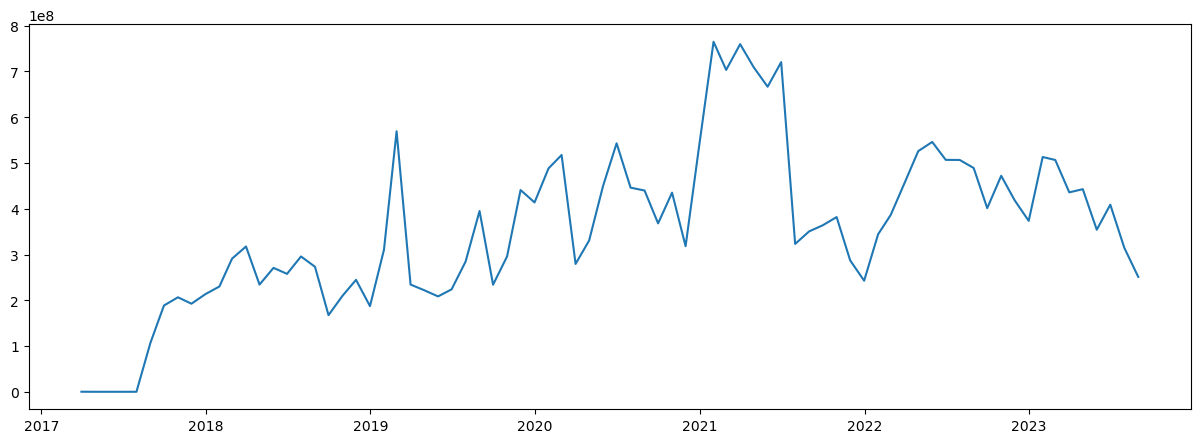

In [14]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_sub)

In [15]:
# Decomposing the data's elements 

decomposition = sm.tsa.seasonal_decompose(df_sub, model='additive')

In [16]:
from pylab import rcParams

rcParams['figure.figsize'] = 18, 7

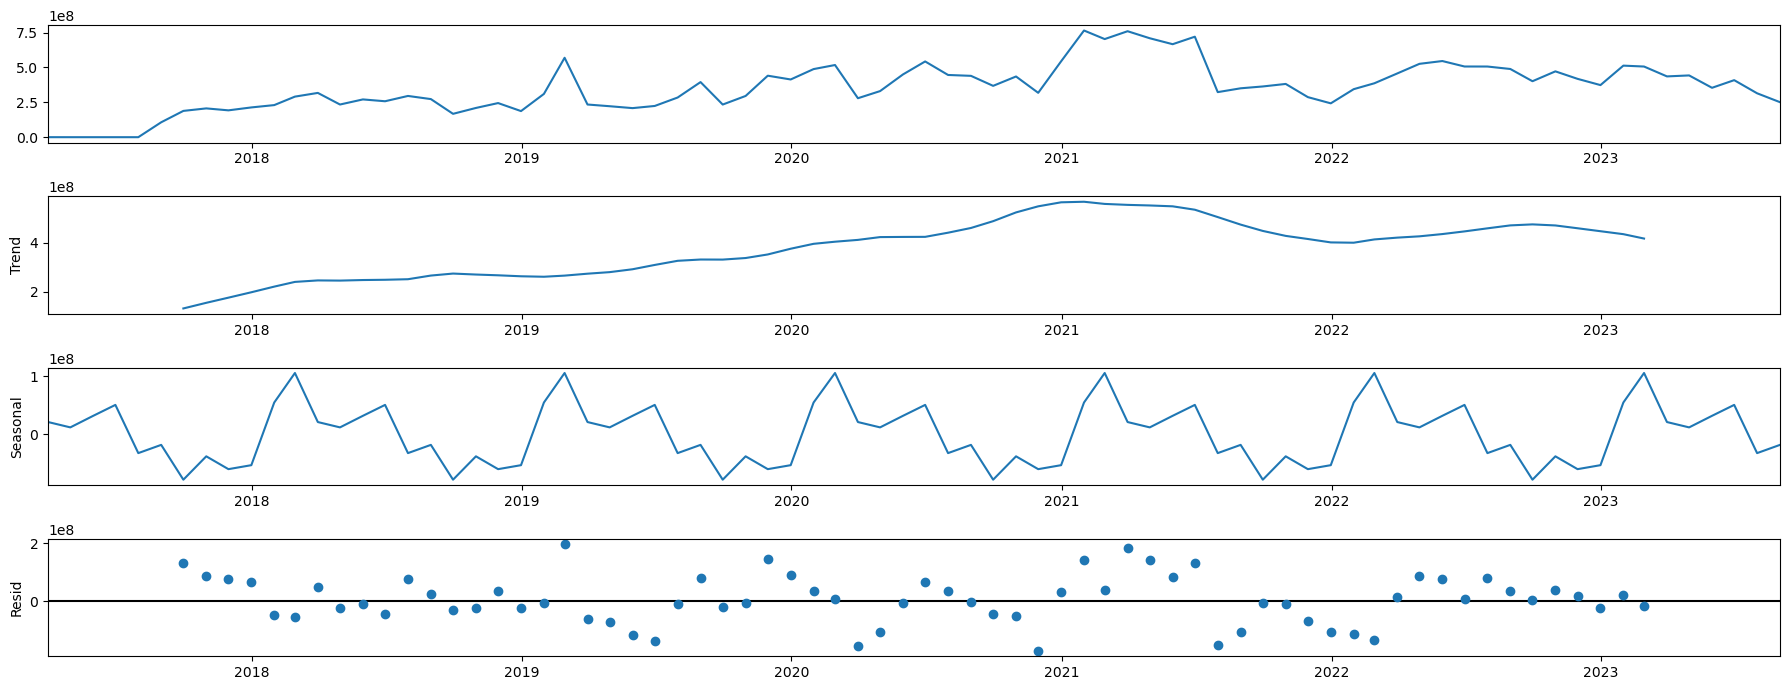

In [17]:
# plot separate components 

decomposition.plot()
plt.show()

### Because the trend chart is different from the level chart, I can conclude that there is a bit of noise in the data and smoothing might be necessary.  This is further validated by the noise chart at the bottom of the above output, which shows a lot of residual noise present in the data.  The seasonality chart shows that there are seasonal fluctuations in my listening volume.  

In [21]:
df_sub_year = df_sub.groupby(pd.Grouper(axis = 0, freq='Y')).sum()

In [22]:
df_sub_year

,ms_played
ts,
2017-12-31,907918376
2018-12-31,2979220476
2019-12-31,3832374521
2020-12-31,5160101360
2021-12-31,6273931998
2022-12-31,5427600914
2023-12-31,3227274150


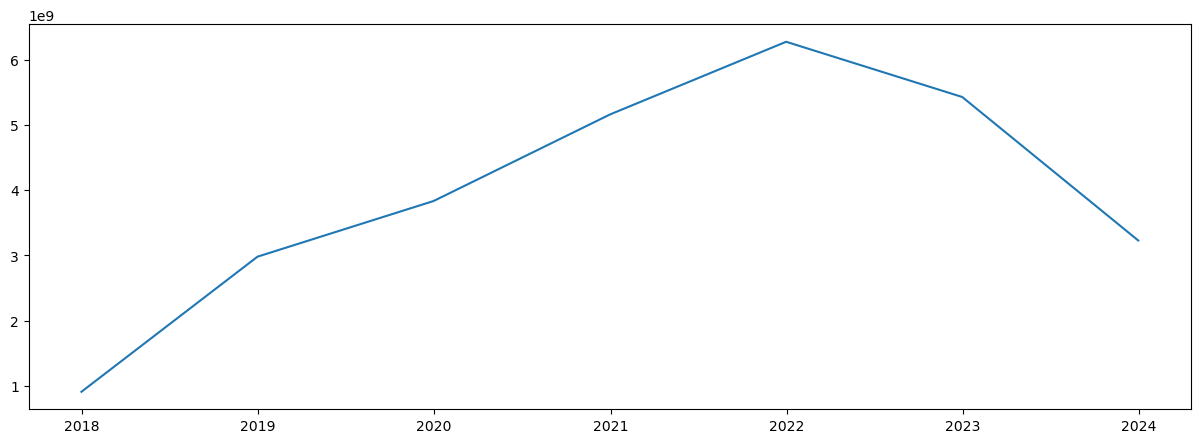

In [30]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_sub_year)

In [31]:
decomposition2 = sm.tsa.seasonal_decompose(df_sub_year, model='additive')

In [32]:
rcParams['figure.figsize'] = 18, 7

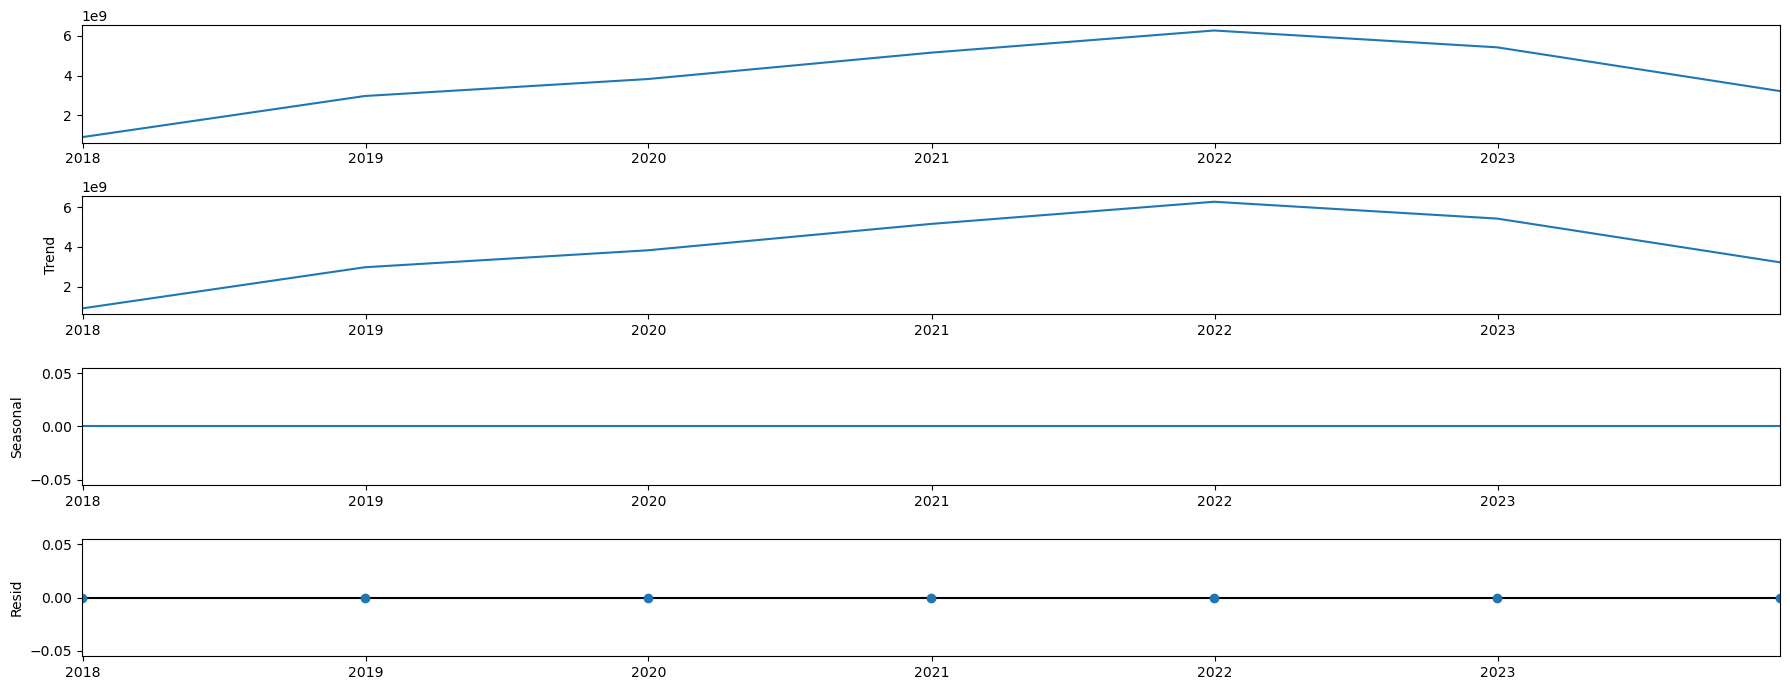

In [33]:
decomposition2.plot()
plt.show()

### When grouping the data by year, we get a lot more smoothness, but the tradeoff is less granularity in the data.  It might be worthwhile to revisit this later, but for now I'm going to stick with the monthly data 

## 03 Dickey-Fuller Test to Determine Stationarity 

In [38]:
from statsmodels.tsa.stattools import adfuller 

def dickey_fuller(timeseries): 
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

dickey_fuller(df_sub['ms_played'])

Dickey-Fuller Stationarity test:
Test Statistic                 -3.117585
p-value                         0.025279
Number of Lags Used             0.000000
Number of Observations Used    77.000000
Critical Value (1%)            -3.518281
Critical Value (5%)            -2.899878
Critical Value (10%)           -2.587223
dtype: float64


### As we see in the results above, the p-value is less than .05, which means that this is a statistically significant result.  The test statistic is smaller than both 5% and 10%, which means we can reject the null hypothesis at those significance levels.  Given that information, we can conclude that there is no unit root and the data is stationary. 

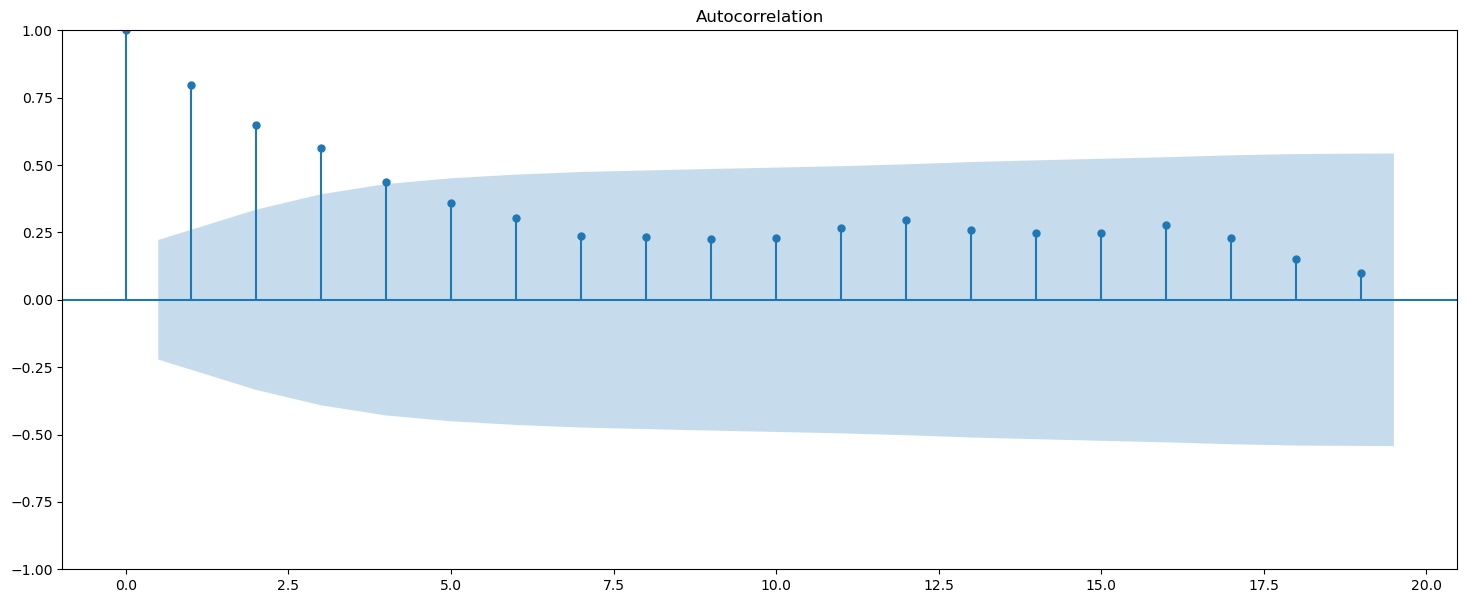

In [39]:
# Checking data for autocorrelcation 

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_sub)
plt.show()

### The chart above shows only 5 lines above the confidence interval, meaning that there are not many lags that are significantly correlated to one another.  Because there are so few lags, we can conclude that this data is stationary and suitable for forecasting purposes. 